# Barcode Decoder Project - Model Training Notebook

* This notebook trains a YOLOv8 model to detect barcodes in images using a custom dataset. It prepares the data, trains the model, evaluates its accuracy, and saves the trained model for future use.

### Step 1 - Mount Google Drive

* This step mounts the Google Drive to Google Colab so that we can access the dataset and save models easily.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 2 - Change Directory to Project Folder

* Navigating to the main project folder inside Drive.

In [7]:
%cd /content/drive/MyDrive/Barcode_Decoder_Project_Final/

/content/drive/MyDrive/Barcode_Decoder_Project_Final


### Step 3 - Extract Dataset

 * Unzipping the custom barcode dataset which contains train, valid, and test folders.

In [8]:
# Already unzipped new_dataset available, no need to run this
# !unzip -o new_dataset.zip

Archive:  new_dataset.zip


### Step 4 - Count Images and Labels

* Verifying if images and labels are present and correctly matched in training, validation, and testing sets.

In [9]:
# Count number of images in train set
!ls /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/train/images | wc -l

# Count number of labels in train set
!ls /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/train/labels | wc -l


# Similarly for valid
!ls /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/valid/images | wc -l
!ls /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/valid/labels | wc -l

# And for test
!ls /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/test/images | wc -l
!ls /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/test/labels | wc -l

2000
2000
500
500
200
200


### Step 5 - Create YOLO Data Configuration File (data.yaml)

#### data.yaml defines:
      * Train, validation, test paths
      * Number of classes (nc: 1 → barcode)
      * Class names

#### Going to the Dataset Directory

In [10]:
%cd /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset

/content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset


In [11]:
# Create the data.yaml file for YOLOv8
data_yaml_content = """
train: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/train/images
val: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/valid/images
test: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/test/images

nc: 1
names: ['barcode']
"""

# Write the YAML content to a file
with open('/content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/data.yaml', 'w') as file:
    file.write(data_yaml_content)


### Step 6 - Install YOLOv8 (Ultralytics)

* Installing YOLOv8 library (Ultralytics) for object detection.

In [12]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

### Step 7 - Load and Train YOLOv8 Model

* Loading YOLOv8 Small model.

* Training it on custom barcode dataset for 50 epochs, 640x640 image size, and batch size of 16.

In [15]:
from ultralytics import YOLO

# Load YOLOv8s model
model = YOLO('yolov8s.pt')

# Train the model
model.train(
    data='/content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/data.yaml',   # Path to data.yaml
    epochs=50,         # Number of epochs for training
    imgsz=640,         # Image size (640x640 is default)
    batch=16,          # Batch size (adjust based on GPU memory)
)

Ultralytics 8.3.120 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

train: Scanning /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/train/labels.cache... 2000 images, 29 backgrounds, 192 corrupt: 100%|██████████| 2000/2000 [00:00<?, ?it/s]

train: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/train/images/01-event-sterling-banner-1_png_jpg.rf.0c76c75b7b55c29b3627eed5af5d9d80.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/train/images/1010_qr_jpg.rf.fb9b65521869d0e162183b752a1bc700.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/train/images/1026_qr_jpg.rf.270ebe73bfa2891f8d2b681a1413c967.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/train/images/1030_qr_jpg.rf.d96b2070c9c75700d8b4ff23b10cc407.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train


val: Scanning /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/valid/labels.cache... 500 images, 11 backgrounds, 55 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]

val: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/valid/images/100_qr_jpg.rf.d1a8e050d8ce125e68ba730435322a66.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/valid/images/101_qrcode_jpeg_jpg.rf.a52fd42a95e818ffbb3fee87886c6fad.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/valid/images/1233_qr_jpg.rf.d5afc3823fd4705eec5cc67dbf328c6f.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/valid/images/253_qr_jpg.rf.83f43696c077bfee68248582f6d66ba9.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/drive/MyDrive/Ba

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.714      3.912      1.933         35        640:  10%|▉         | 11/113 [08:48<1:21:36, 48.01s/it]


KeyboardInterrupt: 

### Step 8 - Prediction on a Single Image (Sample Test)

* Making a prediction on one test image.

* Displaying detected barcode bounding box.


image 1/1 /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/train/images/4001133584517-01_N95_jpg.rf.f42957db4111b170ed7649ca52a1d802.jpg: 640x640 1 barcode, 1865.4ms
Speed: 6.5ms preprocess, 1865.4ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


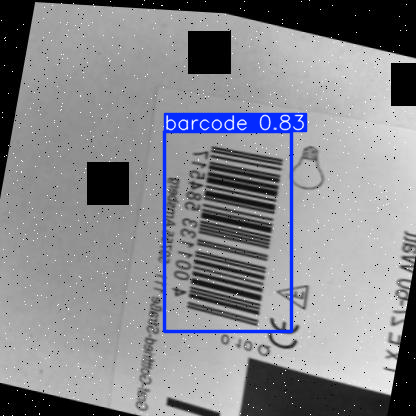

In [46]:
# Use the best.pt model to make predictions directly without retraining the model.
# model = YOLO('/content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/runs/detect/train/weights/best.pt')

# Predict on the image
results = model.predict(source='/content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/train/images/4001133584517-01_N95_jpg.rf.f42957db4111b170ed7649ca52a1d802.jpg', save=True)

# Access the first result object (since results is a list)
result = results[0]

# Show the image with the bounding boxes
result.show()


### Step 9 - Cropping Detected Barcodes

* Cropping barcode regions from detected bounding boxes.

* Saving cropped barcode images.

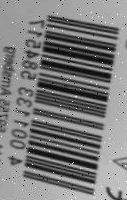

In [40]:
import cv2
from google.colab.patches import cv2_imshow
from pyzbar.pyzbar import decode

for result in results:
    boxes = result.boxes.xyxy  # Get bounding boxes (x1, y1, x2, y2)
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)
        cropped_barcode = result.orig_img[y1:y2, x1:x2]  # Crop image

        # Save cropped barcode image
        cv2.imwrite('/content/drive/MyDrive/Barcode_Decoder_Project_Final/cropped_barcodes/barcode_0.jpg', cropped_barcode)
        cv2_imshow(cropped_barcode)

        # Decode the barcode
        decoded_objects = decode(cropped_barcode)

        for obj in decoded_objects:
          print("Barcode Data:", obj.data.decode("utf-8"))
          print("Type:", obj.type)


### Step 10 - Decode Cropped Barcode

* Installing barcode decoding libraries.

* Decoding barcode data from cropped images.

In [28]:
!apt-get update
!apt-get install -y libzbar0

!pip install pyzbar

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

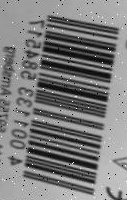

✅ Decoded Data: 4001133584517
📦 Barcode Type: EAN13


In [45]:
import cv2
from google.colab.patches import cv2_imshow
from pyzbar.pyzbar import decode

# Load image
img = cv2.imread('/content/drive/MyDrive/Barcode_Decoder_Project_Final/cropped_barcodes/barcode_0.jpg')
cv2_imshow(img)

# Decode and process each barcode
for obj in decode(img):
    # Decode data
    barcode_data = obj.data.decode('utf-8')
    barcode_type = obj.type

    # Print to console
    print("✅ Decoded Data:", barcode_data)
    print("📦 Barcode Type:", barcode_type)

    # Draw polygon around barcode
    points = obj.polygon
    pts = [(p.x, p.y) for p in points]
    for i in range(len(pts)):
        cv2.line(img, pts[i], pts[(i+1) % len(pts)], (0, 255, 0), 2)

    # Put decoded text on image
    cv2.putText(img, barcode_data, pts[0], cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

### Step 11 - Validate and Evaluate Model Performance

* Evaluating model on validation set to get mAP, Precision, Recall metrics.

In [13]:
metrics = model.val()  # Validate and evaluate model performance
print(metrics)  # Print evaluation metrics (mAP, precision, recall, etc.)

Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 10.5±3.2 MB/s, size: 18.8 KB)


val: Scanning /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/valid/labels.cache... 500 images, 11 backgrounds, 55 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]

val: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/valid/images/100_qr_jpg.rf.d1a8e050d8ce125e68ba730435322a66.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/valid/images/101_qrcode_jpeg_jpg.rf.a52fd42a95e818ffbb3fee87886c6fad.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/valid/images/1233_qr_jpg.rf.d5afc3823fd4705eec5cc67dbf328c6f.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/valid/images/253_qr_jpg.rf.83f43696c077bfee68248582f6d66ba9.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/drive/MyDrive/Ba


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.00it/s]


                   all        445        459      0.967       0.93      0.943      0.683
Speed: 1.4ms preprocess, 9.3ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c63f0bae610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033

### Step 12 - Save Trained Model

* Saving the final trained model for future use.

In [14]:
model.save('/content/drive/MyDrive/Barcode_Decoder_Project_Final/saved_model.pt')  # Save the model after training